In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
in_data=pd.read_csv("C:/Users/Dmwin/Downloads/Jupyter/datasets/insurance.csv")

In [5]:
in_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
in_data.shape

(1338, 7)

In [7]:
in_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
in_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
in_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Dmwin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 600x600 with 0 Axes>

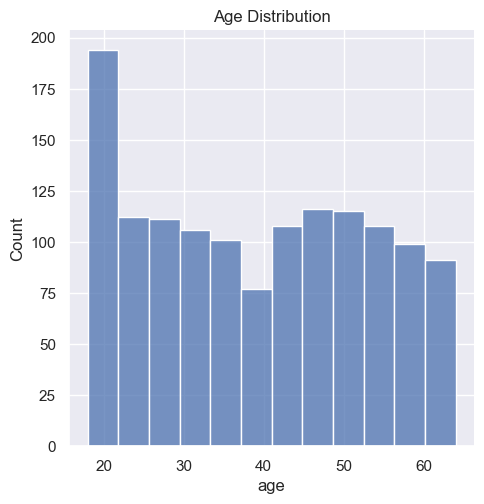

In [11]:
#distribution of ages
sns.set()
plt.figure(figsize=(6,6))
sns.displot(in_data['age'])
plt.title('Age Distribution')
plt.show()

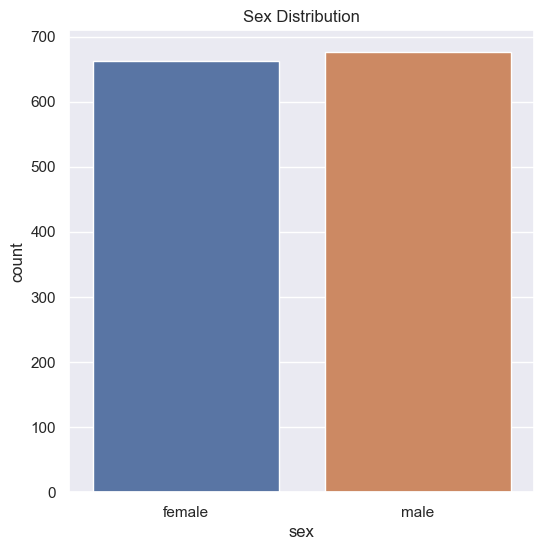

In [12]:
#Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=in_data)
plt.title('Sex Distribution')
plt.show()

In [13]:
in_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\Dmwin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 600x600 with 0 Axes>

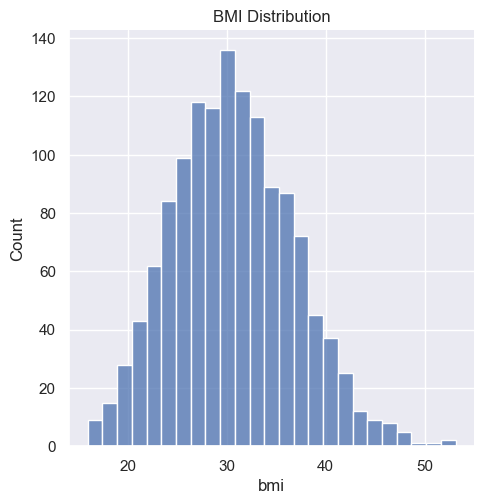

In [14]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.displot(in_data['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal bmi--->18.5 to 24.9

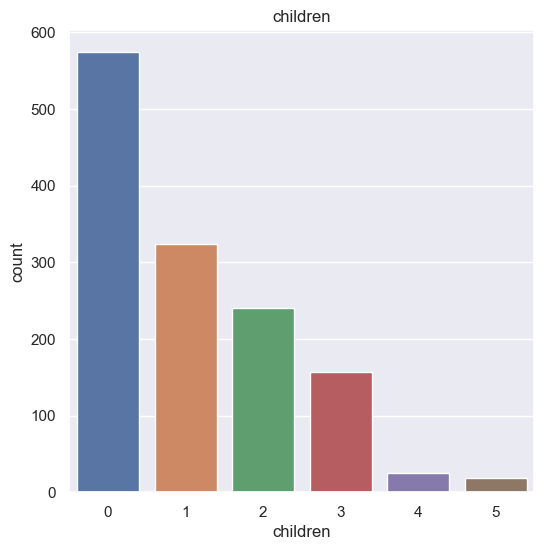

In [15]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=in_data)
plt.title('children')
plt.show()

In [16]:
in_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

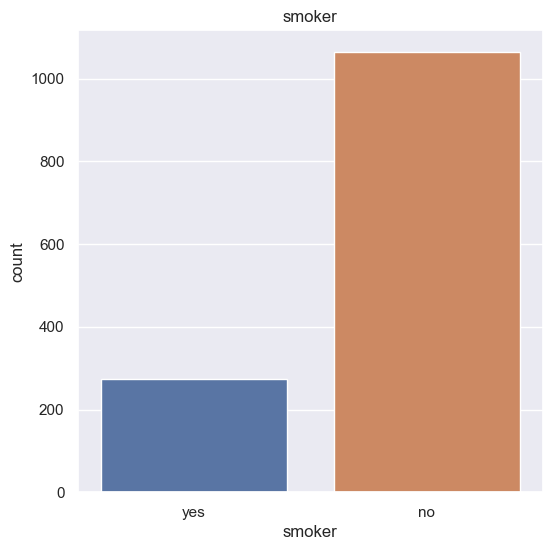

In [17]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=in_data)
plt.title('smoker')
plt.show()

In [18]:
in_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

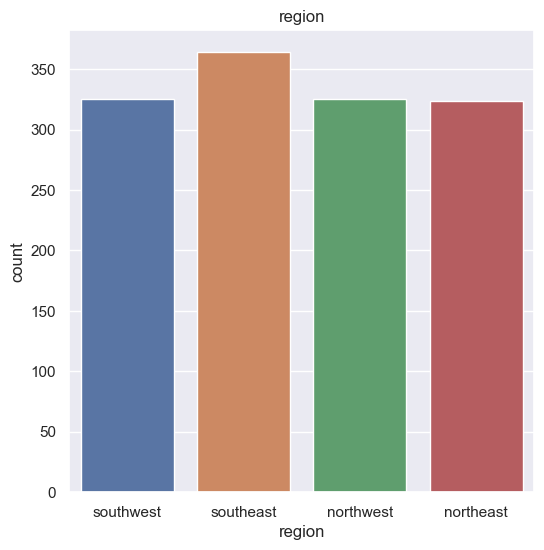

In [20]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=in_data)
plt.title('region')
plt.show

In [21]:
in_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\Dmwin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 600x600 with 0 Axes>

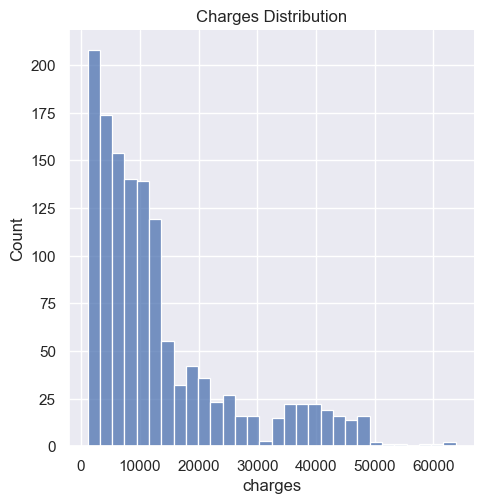

In [22]:
#distribution of charges vlaue
plt.figure(figsize=(6,6))
sns.displot(in_data['charges'])
plt.title('Charges Distribution')
plt.show()

Encoding the Categorical features

In [25]:
in_data.replace({'sex':{'male':0, 'female':1}}, inplace=True)
in_data.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
in_data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [27]:
X = in_data.drop(columns='charges', axis=1)
Y = in_data['charges']

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model

In [29]:
regressor = LinearRegression()

In [30]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [31]:
training_data_prediction =regressor.predict(X_train)

In [32]:
r2_train=metrics.r2_score(Y_train, training_data_prediction)
print('R square value: ', r2_train)

R square value:  0.751505643411174


Testing the system

In [33]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=regressor.predict(input_data_reshaped)
print(prediction) 

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.0805764960523


C:\Users\Dmwin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
